# Визуализация данных

### План:

1. pandas $-$ организация данных
2. [matplotlib](https://matplotlib.org/)
3. [seaborn](https://seaborn.pydata.org/)
4. [wordcloud](https://amueller.github.io/word_cloud/)

In [ ]:
# !pip install wget --q
# !pip install pymorphy2 --q

In [ ]:
import warnings
import re
import random
import wget

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
random.seed = 23  # фиксируем рандомизацию, чтобы работа воспроизводилась
plt.style.use("seaborn-v0_8")
warnings.filterwarnings("ignore")

### Как нужно строить графики:
1. Если график стандартный, используйте matplotlib напрямую из pandas.
2. Если график нестандартный, используйте matplotlib.
3. Если график совсем нестандартный, то разделите его на несколько стандартных и используйте matplotlib.
4. Если нужны профильные красивые графики: японские свечи, ящик с усами, график pairplot или heatmap, то используйте seaborn (это всё тоже можно сделать в matplotlib, но будет дольше).
5. Если у вас есть два часа времени, чтобы построить один график нормального качества, то используйте [plotly](https://plotly.com/python/).
6. Если вам нужно, чтобы получился один красивый график, за который вам очень хорошо заплатят, то используйте plotly.

### Данные

1. Данные о [прокатных удостоверениях фильмов](https://github.com/hse-ling-python/seminars/raw/refs/heads/master/visualization/data/data_cinema.zip).
2. [Классический датасет](https://raw.githubusercontent.com/hse-ling-python/seminars/refs/heads/master/visualization/data/data_titanic.csv) с данными о пассажирах Титаника.

In [ ]:
# wget.download('https://github.com/hse-ling-python/seminars/raw/refs/heads/master/visualization/data/data_cinema.zip')
# wget.download('https://raw.githubusercontent.com/hse-ling-python/seminars/refs/heads/master/visualization/data/data_titanic.csv')

In [ ]:
df_cinema = pd.read_csv("data_cinema.zip", parse_dates=[3, 4, 37, 44, 46, 47])
df_titanic = pd.read_csv("data_titanic.csv", sep=';')

Посмотрим, насколько заполнены данные в обоих датасетах:

In [ ]:
# YOUR CODE HERE

In [ ]:
df_cinema.head()

,Название фильма,Hаименование на иностранном языке,Номер удостоверения,Дата регистрации удостоверения,Дата начала показа фильма,Примечание,Идентификатор записи реестра,Аннотация,Вид Фильма,Категория,...,Код,Права проката переданы,Порядковый номер переоформления/продления,Должность подписанта,ФИО подписанта,Запись удалена,Дата удаления записи,Не показывать на сайте mkrf.ru,дата создания объекта,дата обновления объекта
0,Рок’89,NaN,211004124,2024-01-30 12:00:00+00:00,NaT,NaN,10003030,NaN,Художественный,Видео,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2024-01-30 15:41:59+03:00,2024-02-05 14:17:27+03:00
1,Мама будет против,NaN,211004024,2024-01-30 12:00:00+00:00,2024-02-01 12:00:00+00:00,NaN,10003032,Комедия,Художественный,Видео,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2024-01-30 15:42:13+03:00,2024-02-05 18:23:14+03:00
2,ДЕВЯТЬ С ПОЛОВИНОЙ НЕДЕЛЬ,9 1/2 WEEKS,221005424,2024-01-30 12:00:00+00:00,2024-02-02 12:00:00+00:00,NaN,10003203,NaN,Художественный,Видео,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2024-01-30 16:08:51+03:00,2024-02-06 12:12:04+03:00
3,Как я встретил её маму,NaN,111001324,2024-01-30 12:00:00+00:00,NaT,NaN,10003265,NaN,Художественный,Кино,...,"[{""rightsCategoryUse"":{""code"":""01"",""name"":""Пок...",NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2024-01-30 16:20:44+03:00,2024-03-26 14:41:20+03:00
4,Миссия в Москве,Mo Si Ke xing dong,121002924,2024-01-30 12:00:00+00:00,2024-02-08 12:00:00+00:00,NaN,10003499,NaN,Художественный,Кино,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2024-01-30 18:10:00+03:00,2024-01-30 18:10:00+03:00


In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## Графики

### Обычный график

Точки по *х* и *у* соединены линиями. Нужен, если есть однозначное соответствие *х* и *у* и мы хотим показать как при изменении *х* меняется *у*. Например, по *х* может быть время, а по *у* $-$ частотность слова (как на графиках в НКРЯ).

X: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Y: [6, 39, 60, 58, 54, 72, 97, 116, 121, 150]


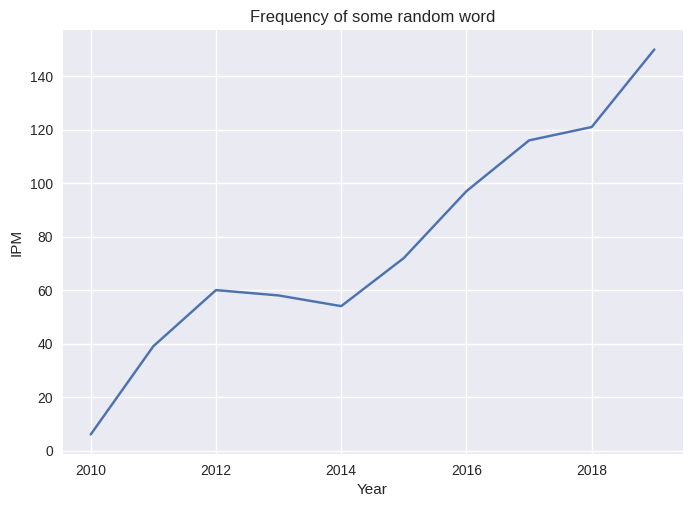

In [ ]:
X = list(range(2010, 2020))
Y = [random.randint(i * 10, (i + 1) * 20) for i in range(len(X))]

print('X:', X)
print('Y:', Y)

plt.plot(X, Y)  # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Frequency of some random word')  # заголовок
plt.ylabel('IPM')  # подпись оси Х
plt.xlabel('Year')  # подпись оси Y
plt.show()

Построим похожий график по количеству фильмов в каждый год.

Посмотрим, какие значения года. Там есть некачественно заполненные данные.

In [ ]:
df_cinema["Год производства"].value_counts()

,count
Год производства,
2023,1132
2019,683
2009,477
2014,469
2006,462
...,...
1940-1953,1
1945-1953,1
1946-1951,1


Напишем функцию, которая будет чистить значения и доставать первое значение из 4 цифр

In [ ]:
def get_year(x):
    if isinstance(x, str):
        res = re.findall("[0-9]{4}", x)  # re.findall находит все вхождения
        # [0-9]{4} значит, что мы ищем цифры от 0 до 9, чтобы их было 4 подряд
        if res:
            return int(res[0])
    return None

In [ ]:
df_cinema["Год производства"] = df_cinema["Год производства"].apply(get_year)

In [ ]:
df_cinema["Год производства"].value_counts().sort_index()

,count
Год производства,
1903.0,1
1908.0,1
1909.0,2
1910.0,1
1911.0,7
...,...
2020.0,27
2021.0,67
2022.0,286


In [ ]:
# YOUR CODE HERE

### Scatter plot

Точки, как и раньше, задаются по *х* и *у*, но теперь не соединяются линиями. Такие графики используются для отображения наблюдений в эксперименте, когда есть два параметра, которые могут принимать различные значения и нужно показать, какие комюбинации есть и как они раположены.

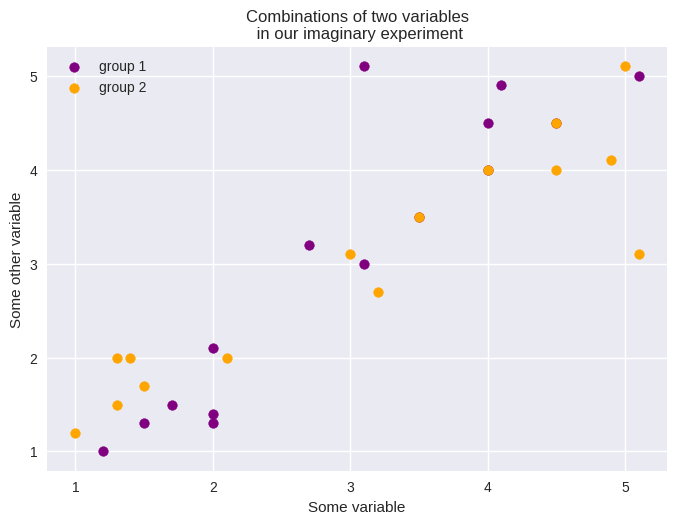

In [ ]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]

plt.scatter(X, Y, color='purple', label='group 1')  # меняем цвет, добавляем label
plt.scatter(Y, X, color='orange', label='group 2')  # нарисуем еще какие-то значения на том же графике
plt.title('Combinations of two variables\n in our imaginary experiment')
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.legend(loc='best')  # автоматический поиск места для легенды
plt.show()

Ещё на график можно что-то дорисовать. Например, дополнительные оси.

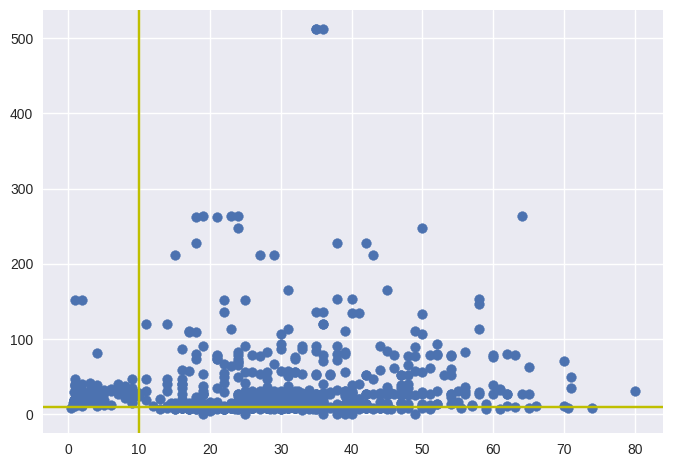

In [ ]:
plt.scatter(df_titanic["Age"], df_titanic["Fare"])
plt.axhline(10, c="y")  # ось x
plt.axvline(10, c="y");  # ось y

Посмотрим на соотношение длины пленки и длины фильма (на примере первых фильмов в списке)

In [ ]:
date_df_cinema = df_cinema[[
    "Метраж (для фильмов на кинопленке)",
    "Продолжительность демонстрации, часы",
    "Продолжительность демонстрации, минуты"
]].dropna().head(100)

date_df_cinema["length"] = date_df_cinema["Продолжительность демонстрации, часы"] * 60 + date_df_cinema["Продолжительность демонстрации, минуты"]
date_df_cinema["Метраж (для фильмов на кинопленке)"] = date_df_cinema["Метраж (для фильмов на кинопленке)"].apply(lambda x: x.replace(',', '.'))
date_df_cinema["Метраж (для фильмов на кинопленке)"] = date_df_cinema["Метраж (для фильмов на кинопленке)"].astype(float)

In [ ]:
# YOUR CODE HERE

Видно, что есть очевидная зависимость и можно посчитать, какая длина пленки соответствует минуте фильма

### Bar plot

Столбчатая диграмма $-$ для категориальных данных по *х* и чисел по *у*, например, если у нас есть дни недели и среднее количество ругательств, которое человек произносит в этот день.

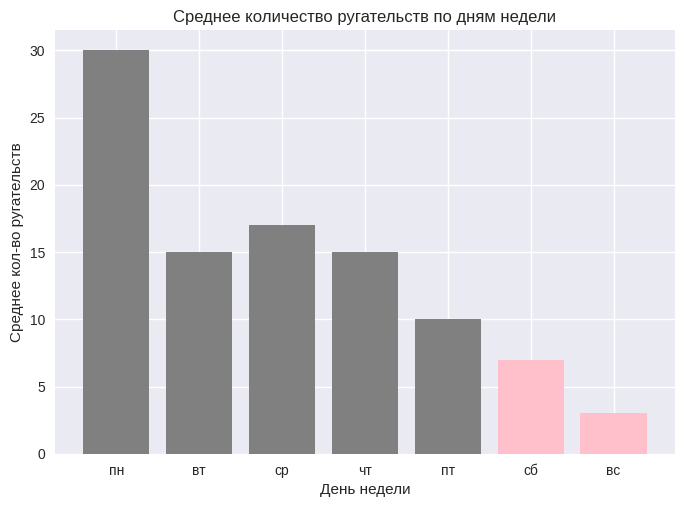

In [ ]:
X = [1, 2, 3, 4, 5]
X2 = [6, 7]  # сделаем выходные отдельно
Y = [30, 15, 17, 15, 10]
Y2 = [7, 3]
DAYS = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']


plt.bar(X, Y, color='grey')
plt.bar(X2, Y2, color='pink')
plt.xticks(ticks=X+X2, labels=DAYS)
plt.title('Среднее количество ругательств по дням недели')
plt.ylabel('Среднее кол-во ругательств')
plt.xlabel('День недели')
plt.show()

Посмотрим на то, сколько фильмов разных типов. Опять же, нужно нормализовать данные, привести в нормальный вид.

In [ ]:
df_cinema["Вид Фильма"].value_counts()

,count
Вид Фильма,
Художественный,4380
Художественный,1854
Анимационный,1389
Прочие,1341
Документальный,1259
Научно-популярный,609
"Прочее (Учебный, Спектакль, …)",82
Кинопериодика,80
научно-популярный,3


In [ ]:
# YOUR CODE HERE

Посмотрим на то, в какие дни начинается показ фильмов. Кажется, что день премьеры $-$ четверг. Но в данных это не так.

Применим функцию для извлечения номера дня недели из объекта типа дата.

In [ ]:
df_cinema["Дата начала показа фильма"].apply(lambda x: x.weekday()).value_counts().sort_index()  # weekday() из datetime

,count
Дата начала показа фильма,
0.0,1829
1.0,2120
2.0,1860
3.0,2369
4.0,1543
5.0,185
6.0,140


In [ ]:
# YOUR CODE HERE

### Круговая диаграмма

Этот тип графика показывает доли категорий объектов. Его нужно исопльзовать осторожно, так как если у нас мало данных, мы можем не получить адекватное представление об их распределении. Особенно, если мы сравниваем доли категори в 2 группах.

In [ ]:
df_cinema['Страна производства'].value_counts().head(10)

,count
Страна производства,
Россия,4392
США,2776
СССР,819
Великобритания,393
Франция,279
Индия,202
Германия,147
Япония,122
Италия,97


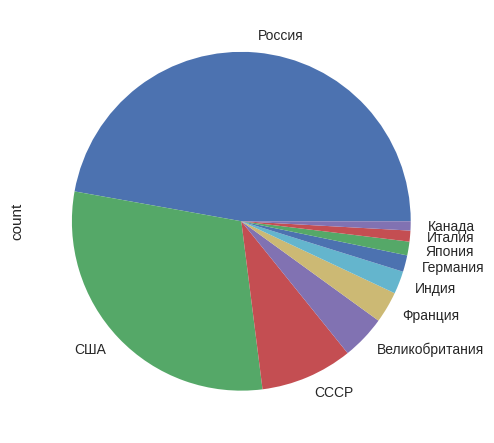

In [ ]:
df_cinema['Страна производства'].value_counts().head(10).plot.pie();

### Гистограмма

Главное отличие гистограммы от барплота $-$ на гистограмме у нас одна переменная и мы хотим изучить только ее: сколько объектов с тем или иным значением (в промежуке значений), а барплот $-$ это значения по категориям.

Посмотрим на распределение длин фильмов:

In [ ]:
df_cinema["Продолжительность демонстрации, минуты"] = df_cinema["Продолжительность демонстрации, минуты"].apply(
    lambda x: x.split("/")[0] if "/" in str(x) else x
)
times = (df_cinema["Продолжительность демонстрации, часы"] * 60 + df_cinema["Продолжительность демонстрации, минуты"].astype(float)).sort_values()

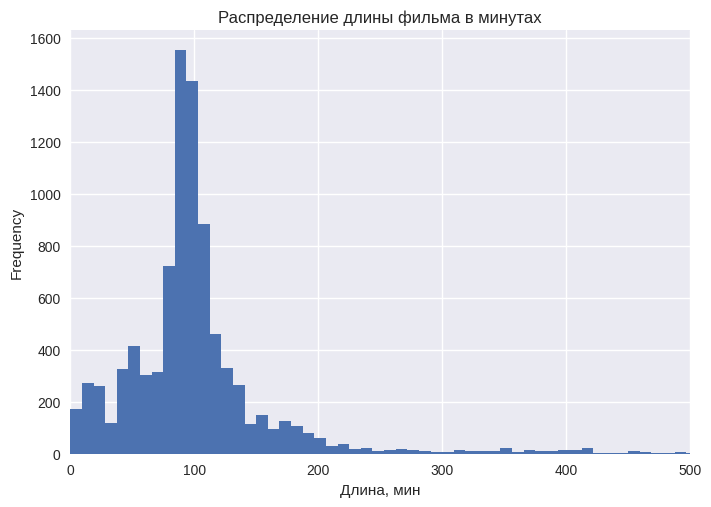

In [ ]:
times.plot.hist(bins=1000, xlim=(0, 500), title="Распределение длины фильма в минутах")
plt.xlabel("Длина, мин");

<Figure size 1000x600 with 0 Axes>

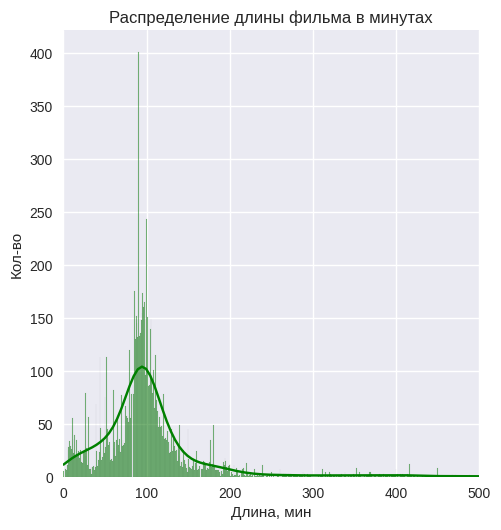

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(times[times < 1000].dropna(), bins=1000, color='green', kde=True);
plt.xlim((-1, 500))
plt.title('Распределение длины фильма в минутах')
plt.ylabel('Кол-во')
plt.xlabel('Длина, мин')
plt.show()

### Несколько графиков на одной фигуре.

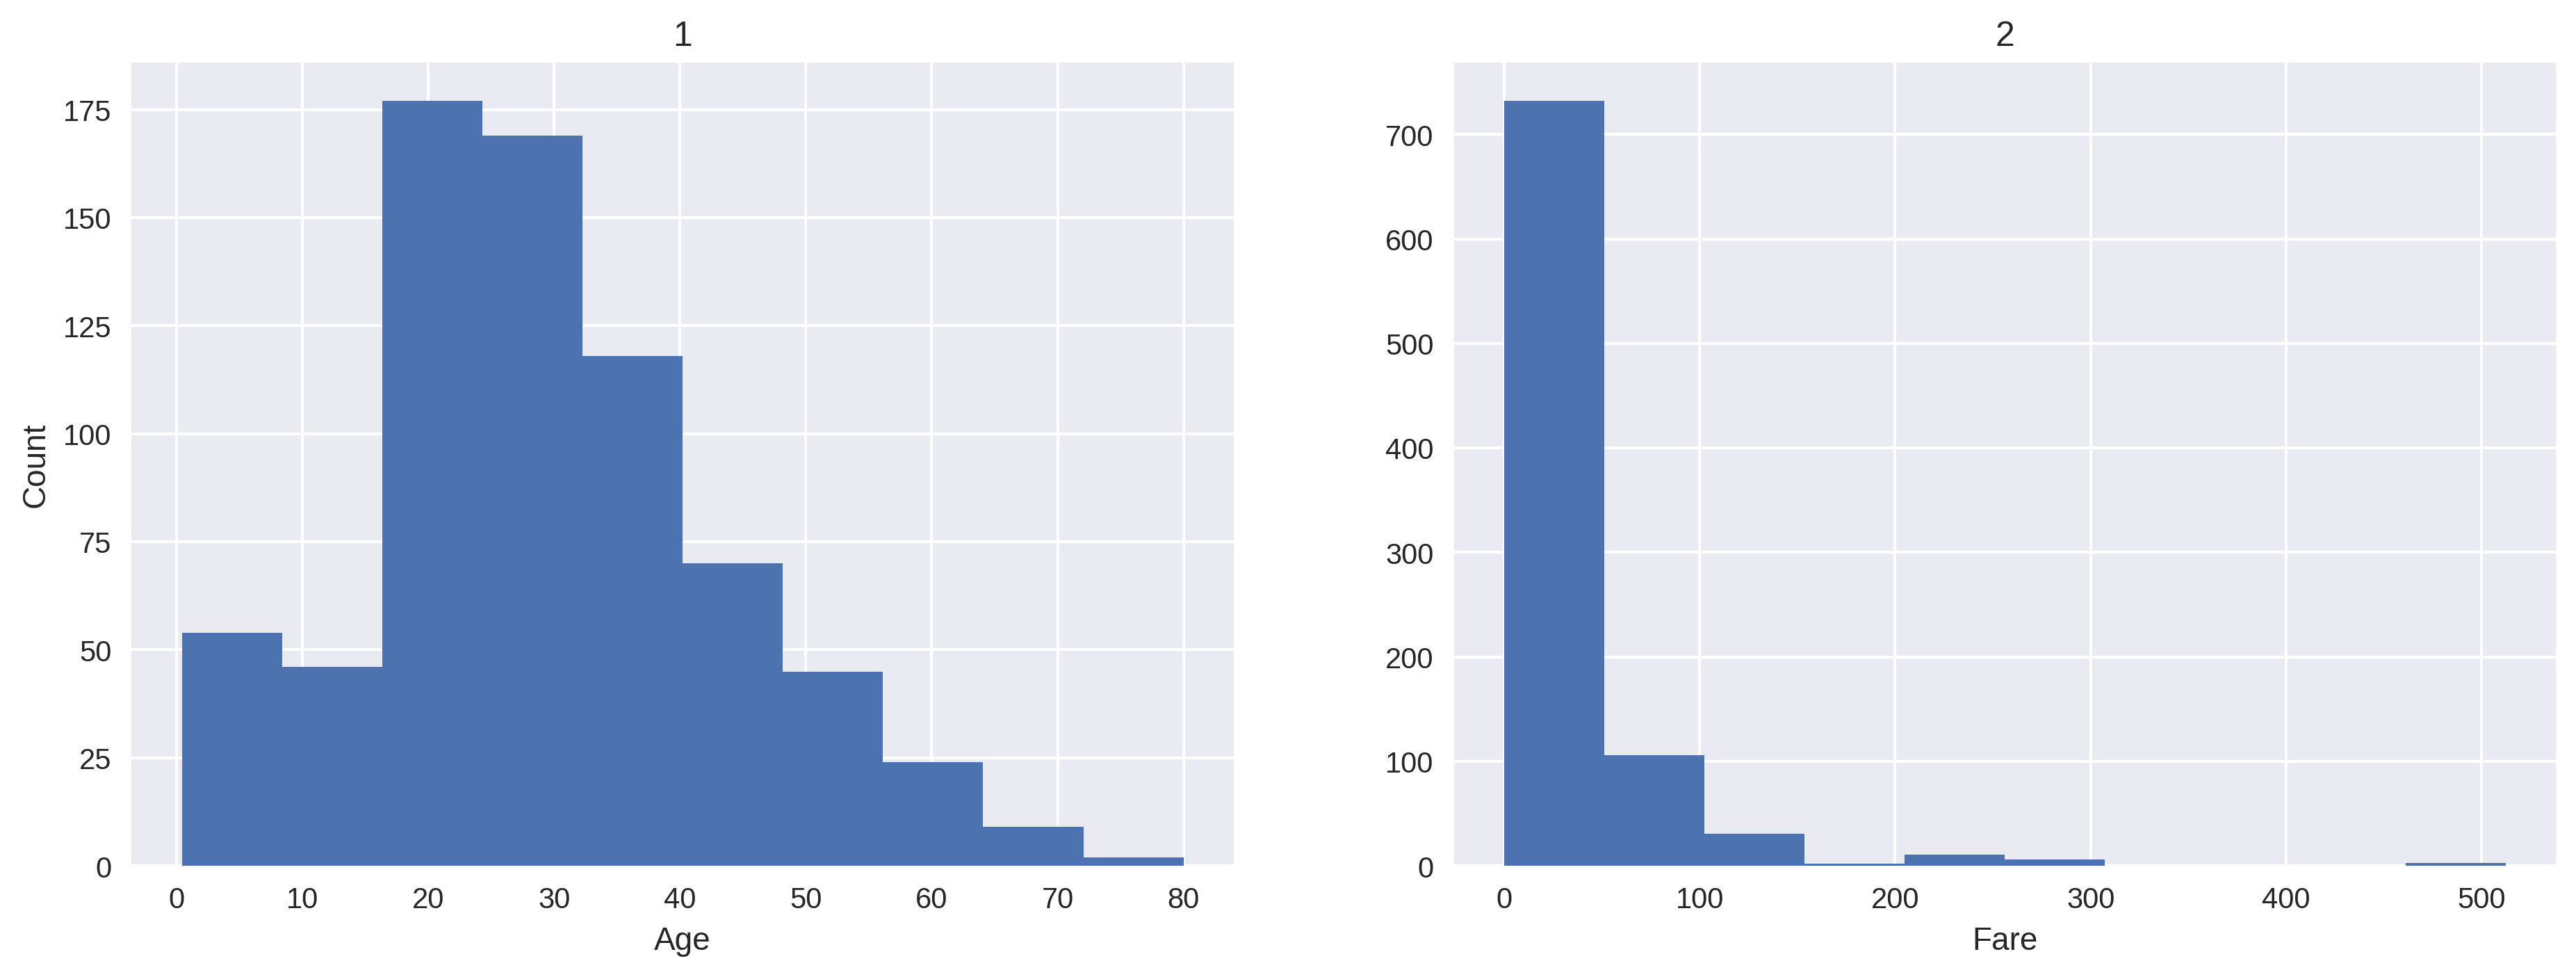

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title("1")
plt.hist(df_titanic["Age"])
plt.ylabel("Count")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
plt.title("2")
plt.hist(df_titanic["Fare"])
plt.xlabel("Fare")

plt.show()

В способе выше мы должны каждый раз переключаться между тем, где мы рисуем, при помощи `plt.subplot(n_rows, n_cols, idx)`. Часто это не очень удобно, поэтому давайте посмотрим на другой способ взаимодействия с подграфиками. Этот способ позволит, например, удобно итерироваться в цикле по графикам и отрисовывать что-то.

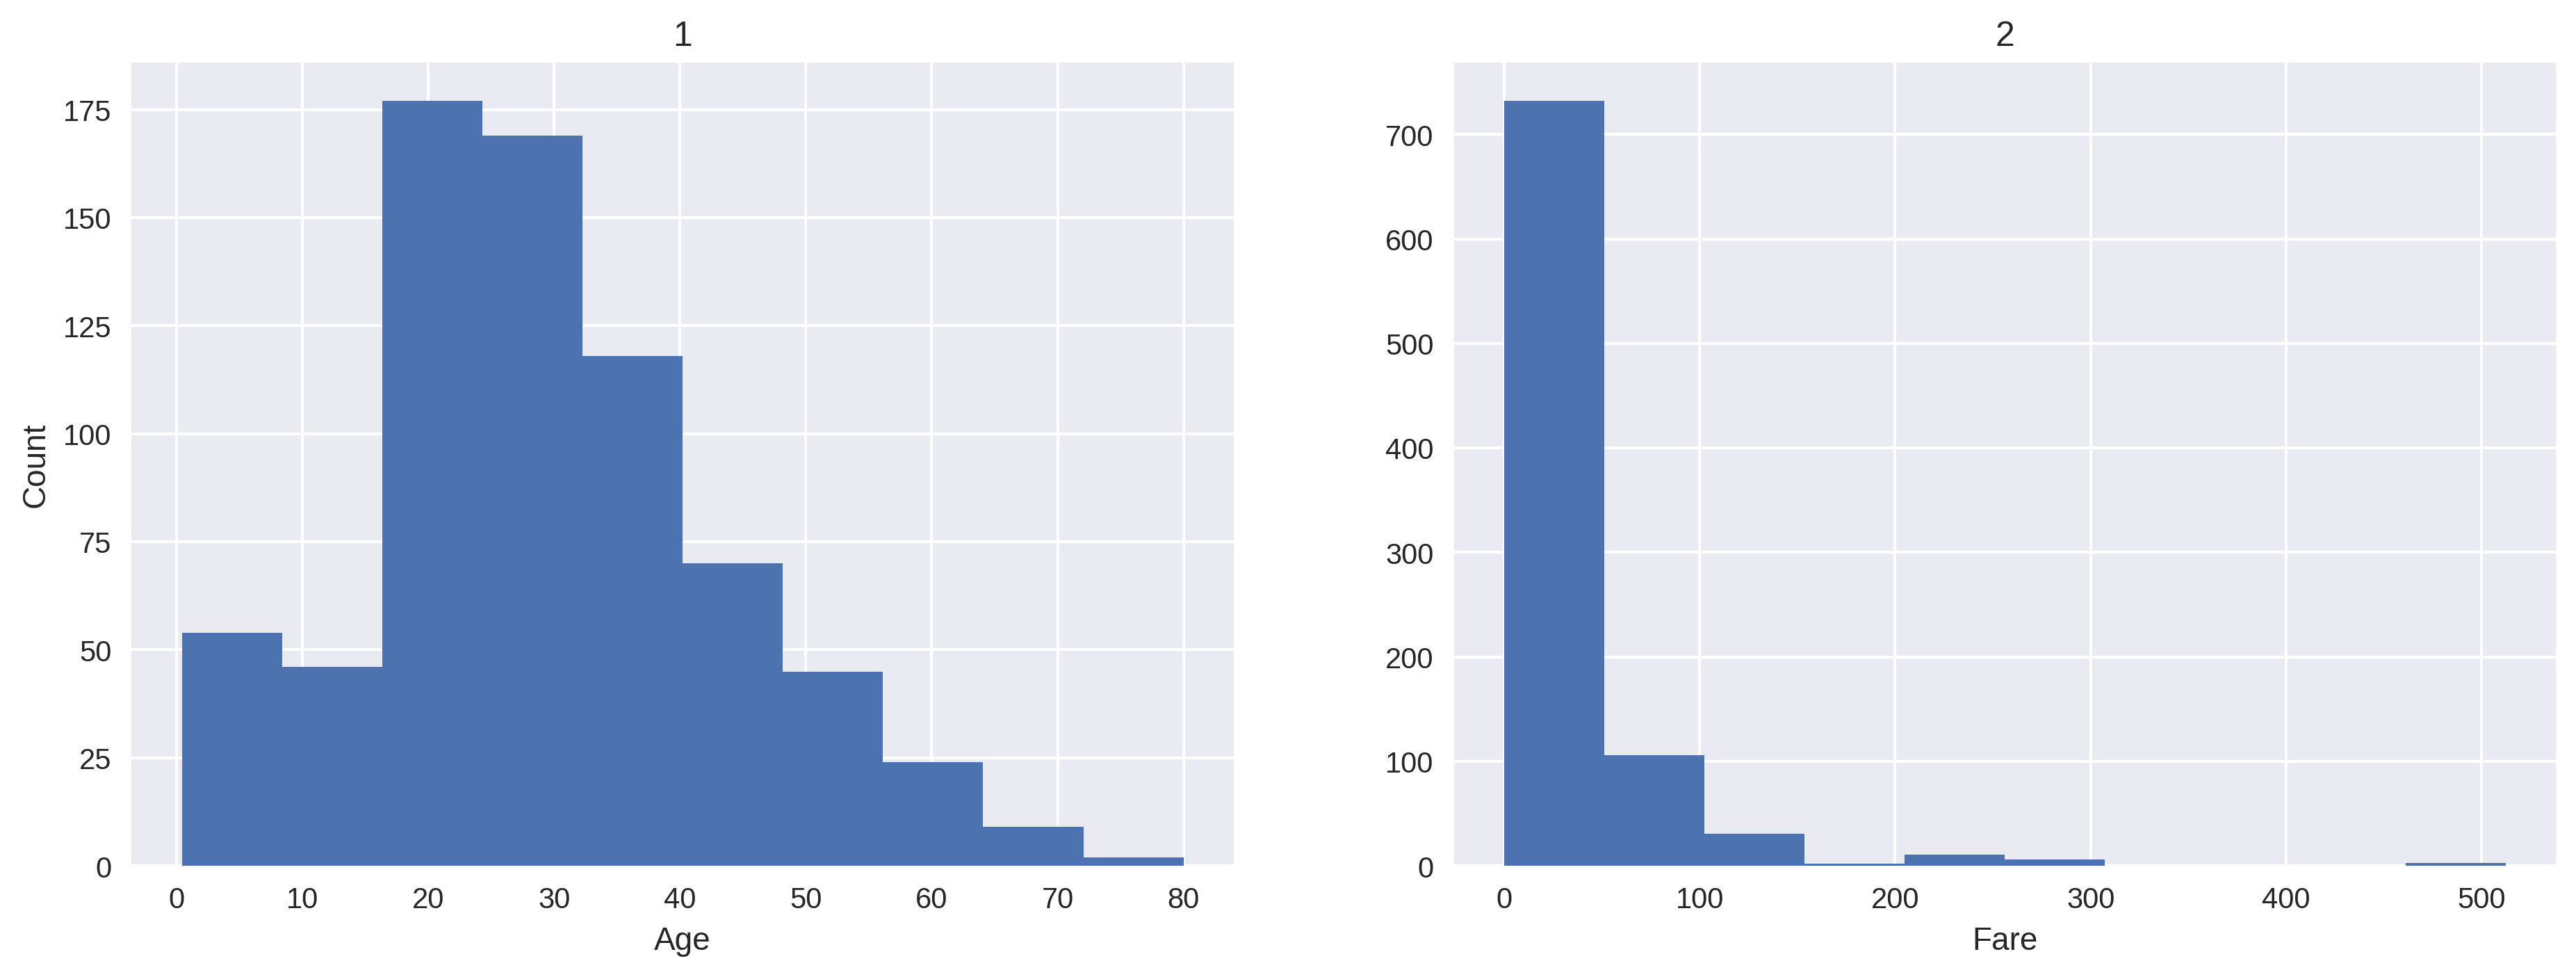

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

axs[0].set_title("1")
axs[0].hist(df_titanic["Age"])
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Age")

axs[1].set_title("2")
axs[1].hist(df_titanic["Fare"])
axs[1].set_xlabel("Fare")

plt.show()

## Seaborn

Посмотрим, как те же самые и другие графики можно построить c помощью библиотеки seaborn.

### Heatmap

Хитмэп нужен, когда у нас есть 3 переменные.

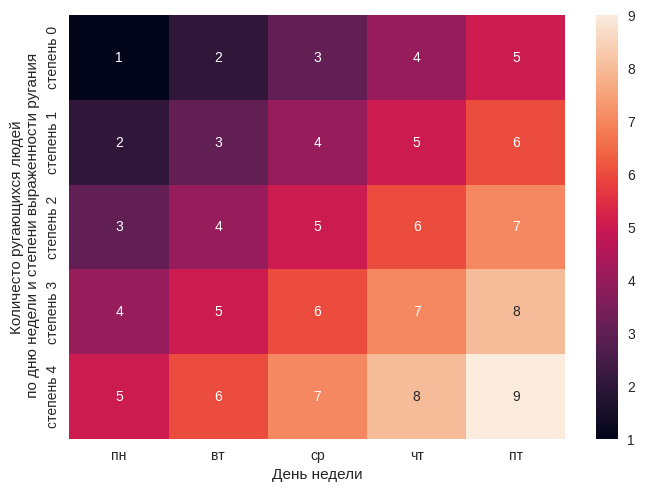

In [ ]:
X = [
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [3, 4, 5, 6, 7],
    [4, 5, 6, 7, 8],
    [5, 6, 7, 8, 9],
]
sns.heatmap(
    X,  # матрица значений
    annot=True,  # значения из матрицы
    xticklabels=DAYS[:5],
    yticklabels=[f'степень {i}' for i in range(0, 5)]
)
plt.xlabel('День недели')
plt.ylabel('Степень выраженности ругания')
plt.ylabel('Количесто ругающихся людей\n по дню недели и степени выраженности ругания')
plt.show()

Для этого типа графика обычно приходится подготавливать данные.

Посмотрим, в какие дни недели стартуют фильмы разных видов:

1. Почистить текст, привести в удобную форму
2. Посчитать, сколько фильмов какого типа выходит по дням недели
3. Трансформировать данные в таблицу дни x виды
3. Отнормировать (превратить в показатели доли дня в общем числе фильмов категории)

In [ ]:
df2_cinema = df_cinema.dropna(subset=["Вид Фильма"])
df2_cinema.loc[:, "Вид Фильма"] = df2_cinema["Вид Фильма"].apply(lambda x: x.strip().lower().capitalize())
df2_cinema.loc[:, "Дата начала показа фильма"] = df2_cinema["Дата начала показа фильма"].apply(lambda x: x.weekday())

In [ ]:
df2_cinema = df2_cinema.groupby(["Вид Фильма", "Дата начала показа фильма"], as_index=False).agg({"Название фильма": "count"})
df2_cinema.head()

,Вид Фильма,Дата начала показа фильма,Название фильма
0,Анимационный,0.0,183
1,Анимационный,1.0,230
2,Анимационный,2.0,321
3,Анимационный,3.0,251
4,Анимационный,4.0,244


Превращаем в таблицу нужного вида

In [ ]:
df2_cinema = df2_cinema.pivot_table(index="Вид Фильма", columns="Дата начала показа фильма", values="Название фильма")
df2_cinema

Дата начала показа фильма,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Вид Фильма,,,,,,,
Анимационный,183.0,230.0,321.0,251.0,244.0,42.0,10.0
Документальный,164.0,223.0,205.0,213.0,214.0,41.0,28.0
Кинопериодика,13.0,7.0,19.0,23.0,15.0,NaN,3.0
Музыкально-развлекательный,NaN,1.0,1.0,NaN,NaN,NaN,NaN
Научно-популярный,86.0,110.0,118.0,110.0,85.0,21.0,6.0
"Прочее (учебный, спектакль, …)",13.0,5.0,14.0,11.0,7.0,2.0,7.0
Прочие,235.0,295.0,278.0,355.0,174.0,1.0,3.0
Художественный,1135.0,1249.0,904.0,1406.0,804.0,78.0,83.0


Превращаем в доли: делим на сумму в строке.

In [ ]:
df3_cinema = df2_cinema.div(df2_cinema.sum(axis=1), axis=0)
df3_cinema

Дата начала показа фильма,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Вид Фильма,,,,,,,
Анимационный,0.142857,0.179547,0.250585,0.195941,0.190476,0.032787,0.007806
Документальный,0.150735,0.204963,0.188419,0.195772,0.196691,0.037684,0.025735
Кинопериодика,0.162500,0.087500,0.237500,0.287500,0.187500,NaN,0.037500
Музыкально-развлекательный,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN
Научно-популярный,0.160448,0.205224,0.220149,0.205224,0.158582,0.039179,0.011194
"Прочее (учебный, спектакль, …)",0.220339,0.084746,0.237288,0.186441,0.118644,0.033898,0.118644
Прочие,0.175242,0.219985,0.207308,0.264728,0.129754,0.000746,0.002237
Художественный,0.200565,0.220710,0.159746,0.248454,0.142075,0.013783,0.014667


Убираем те, где мало данных

In [ ]:
df3_cinema = df3_cinema.drop(["Музыкально-развлекательный", "Кинопериодика"])
df3_cinema

Дата начала показа фильма,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Вид Фильма,,,,,,,
Анимационный,0.142857,0.179547,0.250585,0.195941,0.190476,0.032787,0.007806
Документальный,0.150735,0.204963,0.188419,0.195772,0.196691,0.037684,0.025735
Научно-популярный,0.160448,0.205224,0.220149,0.205224,0.158582,0.039179,0.011194
"Прочее (учебный, спектакль, …)",0.220339,0.084746,0.237288,0.186441,0.118644,0.033898,0.118644
Прочие,0.175242,0.219985,0.207308,0.264728,0.129754,0.000746,0.002237
Художественный,0.200565,0.220710,0.159746,0.248454,0.142075,0.013783,0.014667


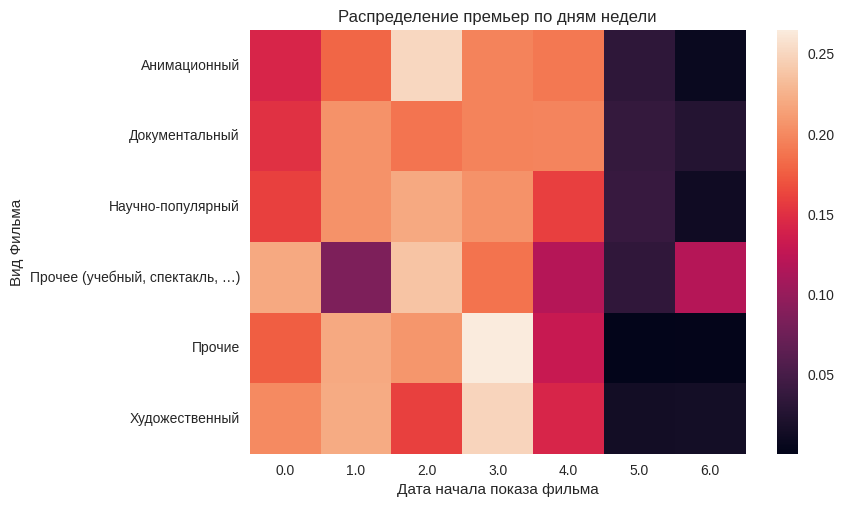

In [ ]:
sns.heatmap(df3_cinema)
plt.title("Распределение премьер по дням недели");

Сделаем её чуть более читаемой.

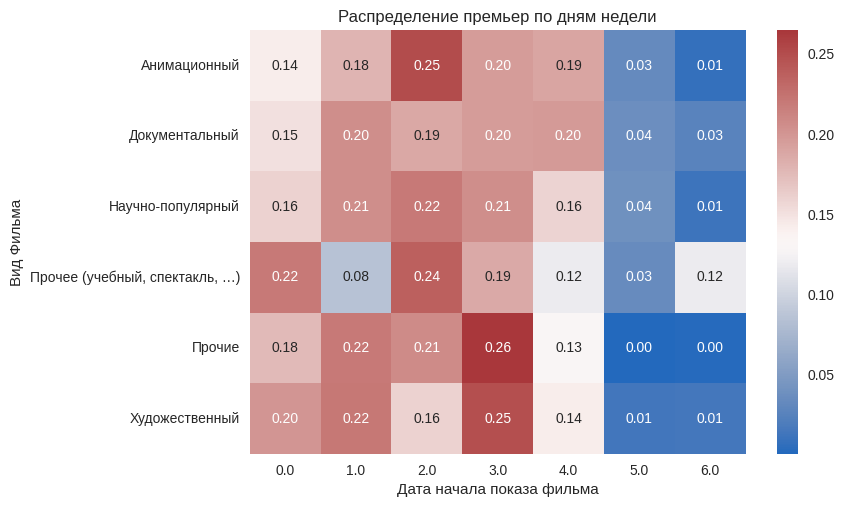

In [ ]:
sns.heatmap(df3_cinema, cmap="vlag", annot=True, fmt="0.2f")
plt.title("Распределение премьер по дням недели");

### Displot

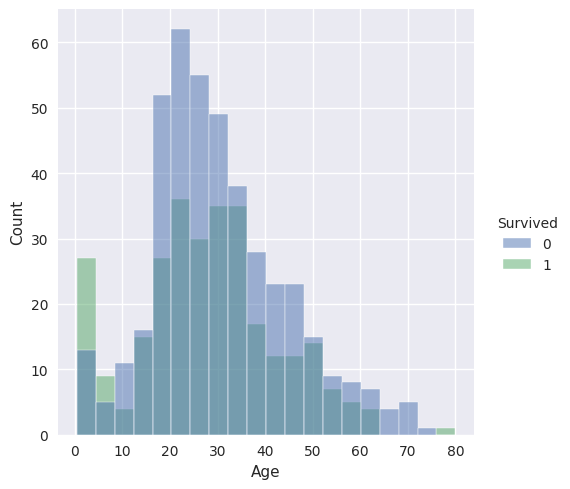

In [ ]:
sns.displot(df_titanic, x="Age", hue="Survived")
plt.show()

В matplotlib будет дольше и менее красиво :(

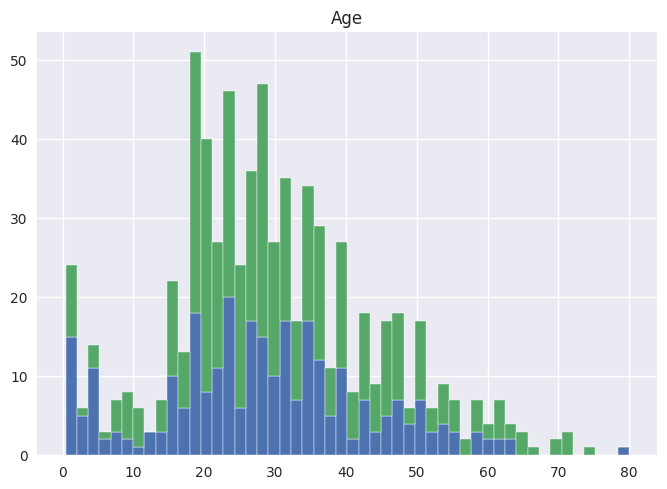

In [ ]:
plt.title("Age")
plt.hist(
    [df_titanic["Age"][df_titanic["Survived"] == 1], df_titanic["Age"][df_titanic["Survived"] == 0]],
    stacked=True,
    bins=50,
);

### Pairplot

По диагонали $-$ маргинальное распределение каждой числовой переменной с учётом целевой переменной. В остальных ячейках $-$ scatter plot каждой пары числовых переменных с учётом целевой переменной.

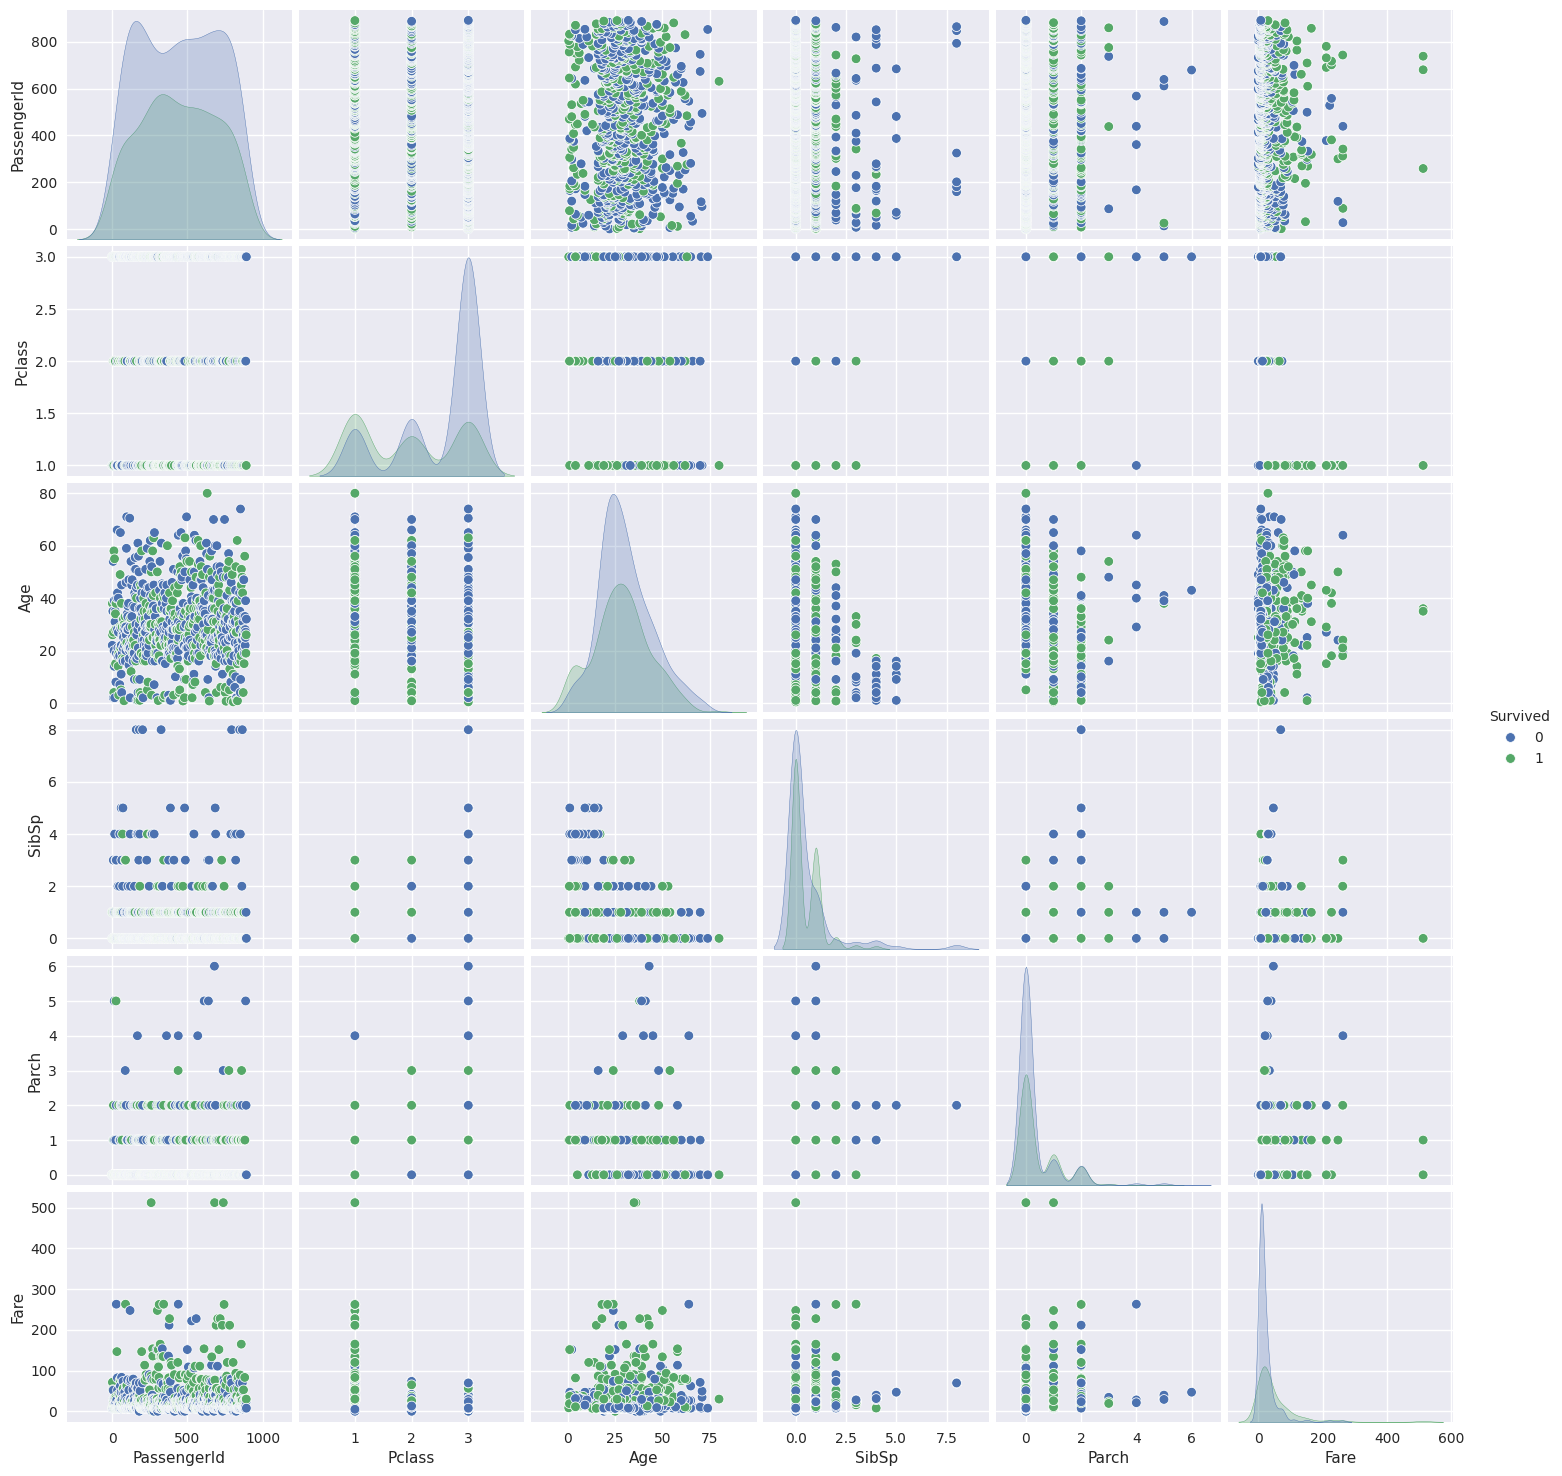

In [ ]:
sns.pairplot(df_titanic, hue="Survived");

### Wordcloud

Один из видов визуализации текста $-$ это облако слов. В зависимости от частотности слова меняется его размер на картинке.

In [ ]:
import nltk
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize

morph = MorphAnalyzer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

In [ ]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

In [ ]:
text = ' '.join(df_cinema["Аннотация"].head(2000).apply(lemmatize).values)

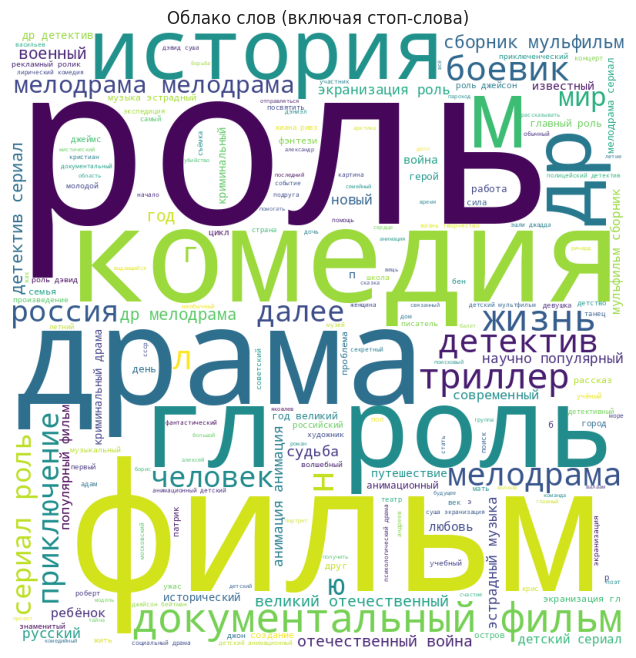

In [ ]:
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
).generate(text)

plt.figure(figsiz =(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов (включая стоп-слова)')
plt.show()